<a href="https://colab.research.google.com/github/sahanal2603/Data-Science-and-Analytics/blob/master/Session_07_Probability_Continuous_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# to define a function for integration 
# takes as input, an array of x, and returns its integral
# to integrate a function of x; 
# integral = area under the curve, area upto the point
# delta_x = x[i+1] - x[i]
# integral[i] = integral[i-1] + delta_x * (y[i+1] + y[i]) * 0.5

def my_integral(x,y):
    N = len(x)
    integral = []
    integral.append(0)

    delta_x = x[1] - x[0]
    for i in range(N-1):
        temp1 = delta_x * (y[i+1] + y[i]) * 0.5
        temp2 = integral[i] + temp1
        integral.append(temp2)
    return integral

In [16]:
# To have a function that generates the Gaussian Distribution 
# Mean = average = mew 
# Standard Deviation = Sigma
# for given input array x

def my_gaussian(mew,sigma,x):
    N = len(x)
    y = []

    const1 = sigma**2
    const2 = 2*np.pi
    const3 = 1/sigma/np.sqrt(const2)

    for i in range(N):
        temp1 = (x[i] - mew)**2
        temp2 = 0.5 * temp1 / const1
        temp3 = np.exp(-temp2) 
        temp4 = const3*temp3
        y.append(temp4)
    
    return y


In [17]:
# To have a function that generates the Uniform Distribution 
# f(x) = 1/(b-a)   for a <= x  <= b, and 0 otherwise
# for given input array x

def my_uniform(a,b,x): 
    y=[]
    N=len(x)
    for i in range(N):
        if x[i] > a and x[i] < b:
            temp = 1/(b-a)
        else:
            temp = 0
        y.append(temp)
    
    return y



In [18]:
# To have a function that generates the Exponential Distribution 
# f(x) = (a) exp(-ax)   for x >=0 , and 0 otherwise
# for given input array x

def my_exponential(a,x):
    y=[]
    N=len(x)

    for i in range(N):
        if x[i] > 0:
            temp = (a) * np.exp( -a * x[i] )
        else:
            temp = 0
        y.append(temp)
    
    return y


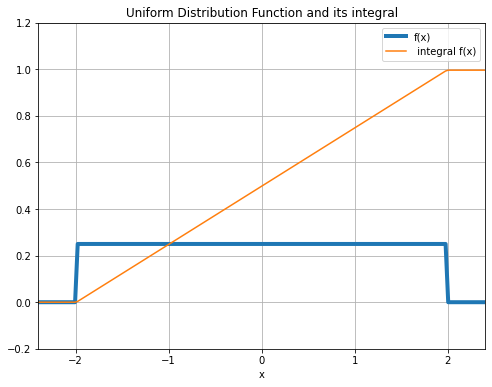

In [19]:
# Example 1
# to generate a Uniform Distribution, in the limits of x=(a,b)
# and then integrate it

a=-2
b=2
N=500
x = np.linspace(a-5, b+5, N)

y=my_uniform(a,b,x)
 
integral_fx = my_integral(x,y)

plt.figure(figsize=(8,6))
plt.plot(x,y, label='f(x)', lw=4)
plt.plot(x,integral_fx, label= ' integral f(x)')
plt.axis([1.2*a,1.2*b,-0.2,1.2])
plt.grid()
plt.xlabel('x')
plt.title('Uniform Distribution Function and its integral')
plt.legend()

No handles with labels found to put in legend.


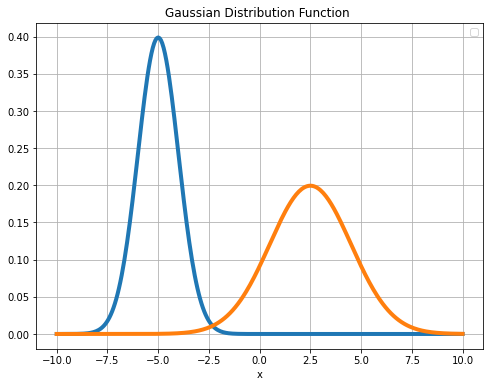

In [20]:
# Example 2
# to generate a Gaussian Distribution 
# of different mean and sigma, for comparison

N=301
x = np.linspace(-10, 10, N)

mew1 = -5
sigma1 = 1
mew2=2.5
sigma2=2

y1= my_gaussian(mew1, sigma1, x)
y2= my_gaussian(mew2, sigma2, x)

integral_fx1 = my_integral(x,y1)
integral_fx2 = my_integral(x,y2)

plt.figure(figsize=(8,6))
plt.plot(x,y1,lw=4)
plt.plot(x,y2,lw=4 )
plt.grid()
plt.xlabel('x')
plt.title('Gaussian Distribution Function ')
plt.legend()

# Understanding Infinity 

In [21]:
# Example 3
# What is INFINITY for a Gaussian distribution? 
# to compute the area within (mew-sigma) to (mew+sigma) of a Gaussian Distribution 
# we compute the integral in the specified limits

M=5
mew = 0
sigma = 1
lower_limit = mew - M*sigma
upper_limit = mew + M*sigma
N=100
x = np.linspace(lower_limit , upper_limit, N)
y= my_gaussian(mew, sigma, x)
integral_fx = my_integral(x,y)
required_area = integral_fx[-1] * 100

print('\n Area from (', lower_limit, 'to', upper_limit,') = ', round(required_area,2), '%' )


 Area from ( -5 to 5 ) =  100.0 %


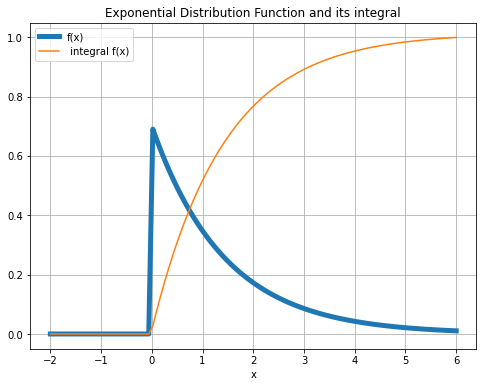

In [22]:
# Example 4
# to generate a Exponential Distribution
# and then integrate it

a=0.7
N=100
x = np.linspace(-2, 6, N)

y=my_exponential(a,x)

integral_fx = my_integral(x,y)

plt.figure(figsize=(8,6))
plt.plot(x,y, label='f(x)', lw=5)
plt.plot(x,integral_fx, label= ' integral f(x)')
plt.grid()
plt.xlabel('x')
plt.title('Exponential Distribution Function and its integral')
plt.legend()




 Area from 0 to  ( 5 * 0.83 ) for Exponential Distribution (in percentage) =  99.426




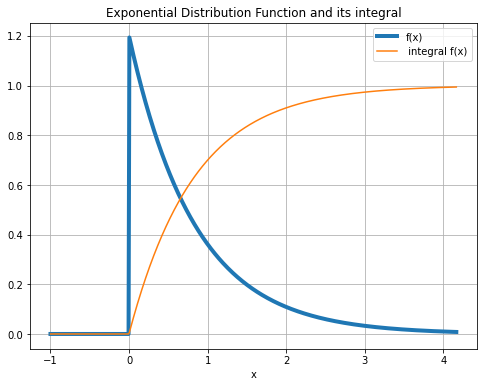

In [23]:
# Example 5
# What is INFINITY for an Exponential distribution? 
# to generate a Exponential Distribution
# here, f(x) = a exp(-ax)  for x>= 0, and 0 otherwise
# relate (1/a) at the time constant of the system
# and then integrate it

a=1.2     
M=5
upper_limit= M* (1/a)
N=500
x = np.linspace(-1, upper_limit, N)

y=my_exponential(a,x)
 
integral_fx = my_integral(x,y)

plt.figure(figsize=(8,6))
plt.plot(x,y, label='f(x)', lw=4)
plt.plot(x,integral_fx, label= ' integral f(x)')
plt.grid()
plt.xlabel('x')
plt.title('Exponential Distribution Function and its integral')
plt.legend()

required_area = integral_fx[-1] * 100

print('\n Area from 0 to  (',M,'*',round(1/a,2),') for Exponential Distribution (in percentage) = ', round(required_area,3) )
print('\n')

# Mean of a Distribution

Mean is given by integral xf(x)


 Mean of the distribution =  15.05 



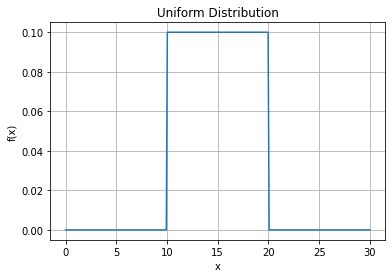

In [24]:
# Example 5
# to generate a Uniform Distribution, in the limits of x=(a,b)
# to compute the mean of the Distribution

a = 10
b = 20
x_lower = 0   # make this value lower than a
x_upper = 30   # make this value greater than b 

N=300
x = np.linspace(x_lower, x_upper, N)
y = my_uniform(a, b, x)


x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)

integral_x_fx = my_integral(x, x_fx)

our_mean = integral_x_fx[-1]      # taking the last value of the integration

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Uniform Distribution')
plt.grid()

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )



 Mean of the distribution =  0.25 


 We can recognize that the mean 1/a, as a =  4 



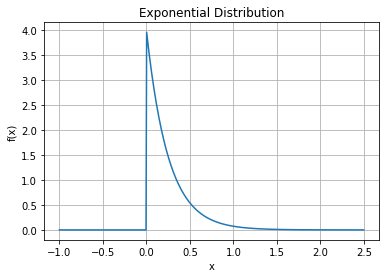

In [25]:
# Example 6
# to generate a an exponential
# to compute the mean of the Distribution

a = 4    
M = 10
upper_limit = M* (1/a)
N = 500
x = np.linspace(-1, upper_limit, N)

y=my_exponential(a,x)

x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)

integral_x_fx = my_integral(x, x_fx)

our_mean = integral_x_fx[-1]      # taking the last value of the integration

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Distribution')
plt.grid()

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )

print('\n We can recognize that the mean 1/a, as a = ', a, '\n')



 Mean of the distribution =  2.5 


 We can recognize that the mean = mew, as mew =  2.5 



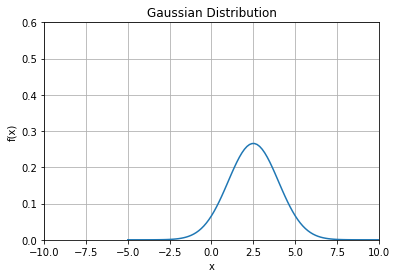

In [26]:
# Example 7
# to generate a Gaussian Distribution 
# to compute the mean of the Distribution

M = 5
mew = 2.5
sigma = 1.5
lower_limit = mew - M*sigma
upper_limit = mew + M*sigma
N=100
x = np.linspace(lower_limit , upper_limit, N)
y= my_gaussian(mew, sigma, x)

x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)

integral_x_fx = my_integral(x, x_fx)

our_mean = integral_x_fx[-1]      # taking the last value of the integration

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Distribution')
plt.grid()
plt.axis([-10,10, 0, 0.6])

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )

print('\n We can recognize that the mean = mew, as mew = ', mew, '\n')


# Variance and Standard Deviation  of a Distribution 

Variance is given by mean of (x-mew)^2

Standard Deviation is sqrt(variance)


 Mean of the distribution =  0.0 


 Variance of the distribution =  33.67 


 Standard Deviation of the distribution =  5.8 



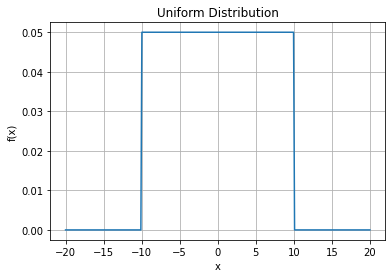

In [27]:
# Example 8
# to generate a Uniform Distribution, in the limits of x=(a,b)
# to compute the mean of the Distribution
# to compute the variance and standard deviation 

a = -10
b = 10
x_lower = -20   # make this value lower than a
x_upper = 20   # make this value greater than b 

N=300
x = np.linspace(x_lower, x_upper, N)
y = my_uniform(a, b, x)


x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)
integral_x_fx = my_integral(x, x_fx)
our_mean = integral_x_fx[-1]      # taking the last value of the integration


x_minus_mean_squared_fx=[]     # building the array, (x-mean)^2 * f(x)
for i in range(N):
    temp1 = (x[i] - our_mean)**2
    temp2 = temp1 * y[i]
    x_minus_mean_squared_fx.append(temp2)

integral_for_variance = my_integral(x, x_minus_mean_squared_fx)
our_variance = integral_for_variance[-1]      # taking the last value of the integration
our_standard_deviation = np.sqrt(our_variance)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Uniform Distribution')
plt.grid()

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )

print('\n Variance of the distribution = ', round(our_variance,2), '\n' )

print('\n Standard Deviation of the distribution = ', round(our_standard_deviation,2), '\n' )



 Mean of the distribution =  0.25 


 We can recognize that the mean 1/a, as a =  4 


 Variance of the distribution =  0.06 


 Standard Deviation of the distribution =  0.25 


 We can recognize that the exponential distribution has mean and standard deviation identical


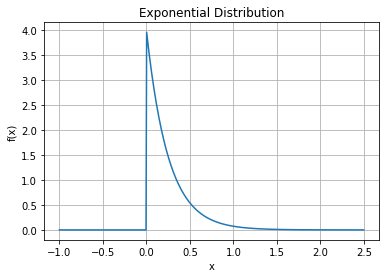

In [28]:
# Example 9
# to generate a an exponential
# to compute the mean of the Distribution
# to compute the variance and standard deviation

a = 4    
M = 10
upper_limit = M* (1/a)
N = 500
x = np.linspace(-1, upper_limit, N)

y=my_exponential(a,x)

x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)

integral_x_fx = my_integral(x, x_fx)
our_mean = integral_x_fx[-1]      # taking the last value of the integration



x_minus_mean_squared_fx=[]     # building the array, (x-mean)^2 * f(x)
for i in range(N):
    temp1 = (x[i] - our_mean)**2
    temp2 = temp1 * y[i]
    x_minus_mean_squared_fx.append(temp2)

integral_for_variance = my_integral(x, x_minus_mean_squared_fx)
our_variance = integral_for_variance[-1]      # taking the last value of the integration
our_standard_deviation = np.sqrt(our_variance)


plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Exponential Distribution')
plt.grid()

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )

print('\n We can recognize that the mean 1/a, as a = ', a, '\n')

print('\n Variance of the distribution = ', round(our_variance,2), '\n' )

print('\n Standard Deviation of the distribution = ', round(our_standard_deviation,2), '\n' )

print('\n We can recognize that the exponential distribution has mean and standard deviation identical')


 Mean of the distribution =  1.0 


 We can recognize that the mean = mew, as mew =  1 


 Variance of the distribution =  9.0 


 Standard Deviation of the distribution =  3.0 


 We can recognize that the standard deviation = sigma, as sigma =  3 



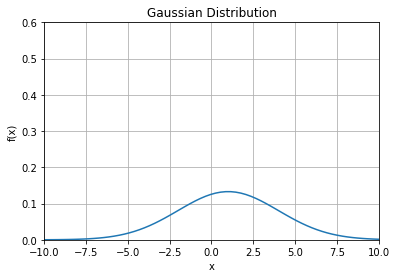

In [29]:
# Example 10
# to generate a Gaussian Distribution 
# to compute the mean of the Distribution
# to compute the variance and standard deviation

M = 5
mew = 1
sigma = 3
lower_limit = mew - M*sigma
upper_limit = mew + M*sigma
N=100
x = np.linspace(lower_limit , upper_limit, N)
y= my_gaussian(mew, sigma, x)

x_fx=[]     # building the array, x f(x)
for i in range(N):
    temp = x[i] * y[i]
    x_fx.append(temp)

integral_x_fx = my_integral(x, x_fx)

our_mean = integral_x_fx[-1]      # taking the last value of the integration


x_minus_mean_squared_fx=[]     # building the array, (x-mean)^2 * f(x)
for i in range(N):
    temp1 = (x[i] - our_mean)**2
    temp2 = temp1 * y[i]
    x_minus_mean_squared_fx.append(temp2)

integral_for_variance = my_integral(x, x_minus_mean_squared_fx)
our_variance = integral_for_variance[-1]      # taking the last value of the integration
our_standard_deviation = np.sqrt(our_variance)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gaussian Distribution')
plt.grid()
plt.axis([-10,10, 0, 0.6])

print('\n Mean of the distribution = ', round(our_mean,2), '\n' )

print('\n We can recognize that the mean = mew, as mew = ', mew, '\n')

print('\n Variance of the distribution = ', round(our_variance,2), '\n' )

print('\n Standard Deviation of the distribution = ', round(our_standard_deviation,2), '\n' )


print('\n We can recognize that the standard deviation = sigma, as sigma = ', sigma, '\n')
